# Merging data

We will learn to merge two data frames and we will make choropleth map in geopandas.

## Data

First dataset: 

Natural Earth's medium scale cultural boundaries data (1:50m)

Second dataset:
A list of Arctic communities and their location (Brook, 2023)
This is a GeoJSON file. 

## Data preparation 

Start by importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

In [3]:
# updata display of pandas dataframes
pd.set_option('display.max.columns', None)

## Countries 

First, import the Natural Eart countries polygons using `gpd.read_file()` function

In [4]:
# import countries polygons
countries = gpd.read_file('data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,14645468.0,14,2019,21440,2019,5. Emerging region: G20,5. Low income,ZI,ZW,ZW,ZWE,ZWE,716,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,None,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,2.5,8.0,29.925444,-18.911640,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,زیمبابوه,Zimbabwe,Ζιμπάμπουε,זימבבואה,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Зімбабве,زمبابوے,Zimbabwe,津巴布韦,辛巴威,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,17861030.0,14,2019,23309,2019,7. Least developed region,4. Lower middle income,ZA,ZM,ZM,ZMB,ZMB,894,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,None,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,26.395298,-14.660804,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,زامبیا,Zambie,Ζάμπια,זמביה,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Замбія,زیمبیا,Zambia,赞比亚,尚比亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,None,Yem.,YE,Republic of Yemen,None,Yemen,None,None,"Yemen, Rep.",None,5,3,3,11,29161922.0,15,2019,22581,2019,7. Least developed region,4. Lower middle income,YM,YE,YE,YEM,YEM,887,887,887,RY,YEM,23425

<AxesSubplot:>

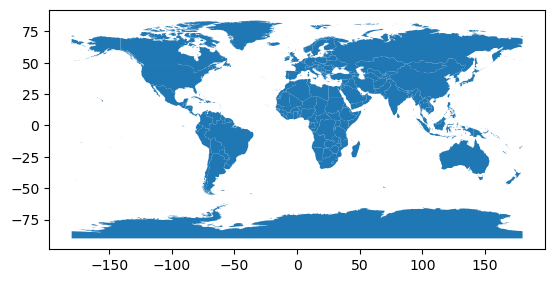

In [7]:
# take a quick look
countries.plot()

In [9]:
# update the column names to in small caps
countries.columns = countries.columns.str.lower()
countries.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_tr', 'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it',
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'geometry'],
      dtype='object', length=169)

In [10]:
# We have too many columns, let's only keep a few*
countries_sub = countries[['admin','type','geometry']]
countries_sub.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


## Arctic communities

Use `geopandas.read_file()` to read directly from URL

In [11]:
# read in Arctic comms data
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


Notice that communities and countries have the same CRS.
This means we can plot them together without updating anything.

In [13]:
communities.crs == countries.crs

True

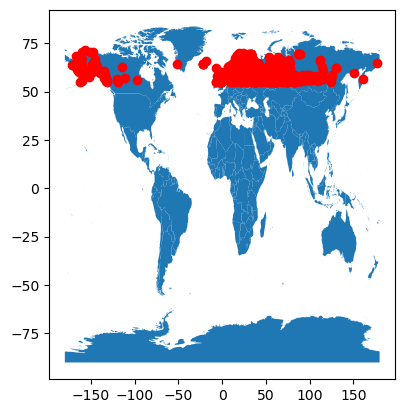

In [17]:
fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')

plt.show()

We want to calculate the number of Arctic communities by country.

In [34]:
# calculate # of Arctic comms by country

# extract number of communities by country as a Series
n_comms = communities.groupby('country').count().name

In [35]:
# convert the Series to a dataframe
n_comms = pd.DataFrame(n_comms).rename(columns={'name':'n_communities'}).reset_index()
n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


In [36]:
# select Scandinavia data

scandi_codes = ['DK', 'NO', 'SE', 'FO', 'FI', 'IS', 'AX']
scandi_n_comms = n_comms[n_comms.country.isin(scandi_codes)].copy()
scandi_n_comms

,country,n_communities
0,AX,1
3,DK,72
5,FI,98
6,FO,1
9,IS,5
12,NO,48
14,SE,133


## Merge datasets
To merge two datasets they need to have at least one column in common. 
Currently, our datasets do not have any columns in common:

In [37]:
countries_sub.head(2)

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."


In [38]:
scandi_n_comms.head(2)

,country,n_communities
0,AX,1
3,DK,72


We can fix this by adding an `admin` column to `scandi_n_comms`

In [40]:
## Add country names
scandi_names = ['Aland Islands',
                'Denmark',
                'Finland',
                'Faroe Islands',
                'Iceland',
                'Norway',
                'Sweden']
scandi_n_comms['admin'] = scandi_names
scandi_n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
3,DK,72,Denmark
5,FI,98,Finland
6,FO,1,Faroe Islands
9,IS,5,Iceland
12,NO,48,Norway
14,SE,133,Sweden


To merge dataframes we can use the `pandas.merge()` function.
The basic syntax for it is:
```python
output_df = pd.merge(left_df, 
                     right_df, 
                     how = type_of_join,
                     on = column_to_join)
```
where:
- `output_df`: dataframe resulting from merge
- `left_df`: dataframe "on the left side"
- `right_df`: dataframe "on the right side"
- `how`: specifies type of join
- `on`: specifies column to merge(join) by

We will do an innter join of both dataframes:

In [41]:
# merge dataframes
scandi_countries = pd.merge(countries_sub,
                            scandi_n_comms,
                            how='inner',
                            on='admin')
scandi_countries

,admin,type,geometry,country,n_communities
0,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
1,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
2,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
3,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
4,Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
5,Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


Notice Aland Islands is not there. 
We can verify that 'Aland Islands' is *nowhere* in our original countries dataframe like this:

In [42]:
# check Aland Islands is nowhere in data frame
'Aland Islands' in countries.values

False

In [44]:
countries.values

array([['Admin-0 country', 1, 3, ..., None, None,
        <POLYGON ((31.3 -22.4, 31.2 -22.3, 31.1 -22.3, 30.9 -22.3, 30.7 -22.3, 30.5 ...>],
       ['Admin-0 country', 1, 3, ..., None, None,
        <POLYGON ((30.4 -15.6, 30.3 -15.6, 30 -15.6, 29.7 -15.6, 29.5 -15.7, 29.3 -1...>],
       ['Admin-0 country', 1, 3, ..., None, None,
        <MULTIPOLYGON (((53.1 16.6, 52.6 16.5, 52.4 16.4, 52.3 16.3, 52.2 16.2, 52.2...>],
       ...,
       ['Admin-0 country', 3, 4, ..., None, None,
        <MULTIPOLYGON (((-45.7 -60.5, -45.5 -60.5, -45.4 -60.6, -45.4 -60.6, -45.2 -...>],
       ['Admin-0 country', 3, 6, ..., None, None,
        <POLYGON ((-63.1 18.1, -63 18.1, -63 18, -63 18, -63.1 18, -63.1 18.1, -63.1...>],
       ['Admin-0 country', 5, 6, ..., None, None,
        <POLYGON ((179 -8.52, 179 -8.53, 179 -8.53, 179 -8.51, 179 -8.49, 179 -8.47,...>]],
      dtype=object)

Aland Islands is an autonomous region of Finland.

In [45]:
scandi_n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
3,DK,72,Denmark
5,FI,98,Finland
6,FO,1,Faroe Islands
9,IS,5,Iceland
12,NO,48,Norway
14,SE,133,Sweden


In [47]:

scandi_countries = scandi_countries.set_index('admin')
scandi_countries

,type,geometry,country,n_communities
admin,,,,
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


In [49]:
# update the Finland row to have an extra community
scandi_countries.at['Finland','n_communities'] += 1

In [50]:
scandi_countries

,type,geometry,country,n_communities
admin,,,,
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,99
Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


## Choropleth map

<AxesSubplot:>

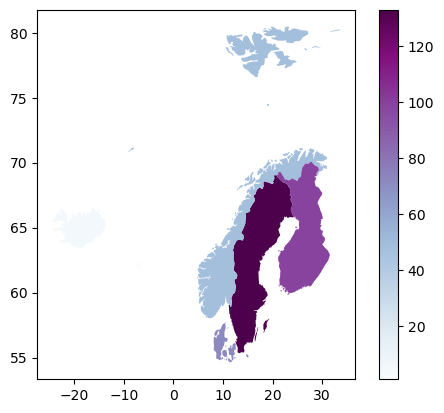

In [54]:
scandi_countries.plot(column='n_communities', 
                     legend = True, 
                      cmap='BuPu')